# Lab 4

## import libs and connect to database

In [61]:
import pandas
import configparser
import psycopg2

In [62]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [63]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                            )

In [64]:
cur=conn.cursor()

## q1

In [65]:
sql_q1 = """
           select * from gp26.student 
            """

In [66]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA
4,s6@jmu.edu,s6,IA
5,s7@jmu.edu,s7,IA
6,s8@jmu.edu,s8,IA
7,s9@jmu.edu,s9,IA
8,s10@jmu.edu,s10,IA
9,s5@jmu.edu,s5,IA


## q2

In [69]:
sql_q2 = """
         select gp26.professor.p_name,
         gp26.course.c_name
         from gp26.professor
         inner join gp26.course
         on gp26.professor.p_email = gp26.course.p_email
        """

In [70]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,xuebin wei,data mining
1,noel hendrickson,counterfactual reasoning
2,ronald raab,homeland security
3,ronald raab,awareness understanding WMD
4,timothy walton,hypothesis testing


## q3

In [11]:
sql_q3 = """
        select c_number,
        count (c_number) as enrolled
        from gp26.enroll_list
        group by c_number
        order by enrolled desc
        """

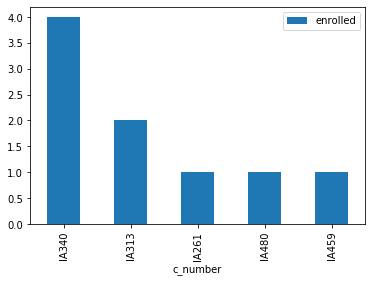

In [13]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4

In [14]:
sql_q4 = """
         select gp26.professor.p_name,
         count(gp26.course.c_name) as teaching_number
         from gp26.professor
         inner join gp26.course
         on gp26.professor.p_email = gp26.course.p_email
         group by gp26.professor.p_name
         order by teaching_number desc
        """

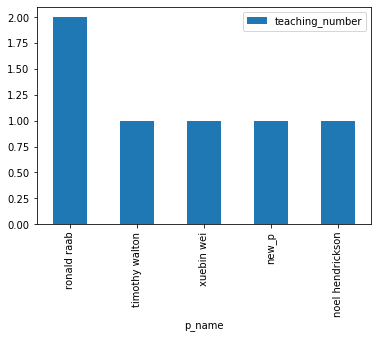

In [15]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## q5

In [71]:
sql_q5_professor = """
                    insert into gp26.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_p2@jmu.edu','new_p2','n_office')

In [72]:
cur.execute(sql_q5_professor)

In [73]:
conn.commit()

In [74]:
df=pandas.read_sql_query('select * from gp26.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,xuebin wei,isat/cs112
1,hendrinx@jmu.edu,noel hendrickson,isat/cs317
2,raabrw@jmu.edu,ronald raab,isat/cs156
3,new_p@jmu.edu,new_p,new_office
4,waltontr@jmu.edu,timothy walton,isat/cs326
5,new_p2@jmu.edu,new_p2,n_office


In [87]:
sql_q5_course = """
                insert into gp26.course(c_number,c_name,room,p_email)
                values('{}','{}','{}','{}')
                """.format('ia_new','new_c_name','online','new_p2@jmu.edu')

In [88]:
cur.execute(sql_q5_course)

In [89]:
conn.commit()

In [90]:
df=pandas.read_sql_query('select * from gp26.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA340,data mining,online,weixx@jmu.edu
1,IA313,counterfactual reasoning,isat/cs148,hendrinx@jmu.edu
2,IA480,homeland security,isat/cs159,raabrw@jmu.edu
3,IA459,awareness understanding WMD,engeo1301,raabrw@jmu.edu
4,IA261,hypothesis testing,isat/cs348,waltontr@jmu.edu
5,ia_new,new_c_name,online,new_p2@jmu.edu


## q6

In [91]:
sql_q6_course = """
                update gp26.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p2@jmu.edu','waltontr@jmu.edu')

In [92]:
cur.execute(sql_q6_course)

In [93]:
conn.commit()

In [94]:
df=pandas.read_sql_query('select * from gp26.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA340,data mining,online,weixx@jmu.edu
1,IA313,counterfactual reasoning,isat/cs148,hendrinx@jmu.edu
2,IA480,homeland security,isat/cs159,raabrw@jmu.edu
3,IA459,awareness understanding WMD,engeo1301,raabrw@jmu.edu
4,ia_new,new_c_name,online,new_p2@jmu.edu
5,IA261,hypothesis testing,isat/cs348,new_p2@jmu.edu


In [95]:
sql_q6_professor = """
                    delete from gp26.professor
                    where p_email = '{}'
                    """.format('waltontr@jmu.edu')

In [96]:
cur.execute(sql_q6_professor)

In [97]:
conn.commit()

In [98]:
df=pandas.read_sql_query('select * from gp26.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,xuebin wei,isat/cs112
1,hendrinx@jmu.edu,noel hendrickson,isat/cs317
2,raabrw@jmu.edu,ronald raab,isat/cs156
3,new_p@jmu.edu,new_p,new_office
4,new_p2@jmu.edu,new_p2,n_office


## close connection

In [99]:
cur.close()
conn.close()